# **1. Perkenalan Dataset**


Data set ini adalah data penjualan mobil bekas pada suatu perusahaan yang terdiri dari :  

- kolom Brand : menjelaskan tentang Brand mobil yang dijual
- kolom model : menjelaskan model yang dijual pada tiap merek mobil
- kolom Year : menjelaskan tentang keluaran tahun berapa mobil tersebut
- kolom Mileage : Jarak tempuh kendaraan (dalam kilometer).
- kolom Price : Harga kendaraan (dalam satuan tertentu).
- kolom Fuel_Type : Jenis bahan bakar (Petrol, Diesel, Electric, dll.).
- kolom Transmission : Jenis transmisi (Manual, Automatic).
- kolom Owner_Type : Status kepemilikan (First, Second, Third).
- kolom Region : Lokasi pembelian.
- kolom Condition : Kondisi kendaraan (Excellent, Average, dll.).

tujuan dari pengambilan data ini adalah untuk membuat clustering dari data yang ada kemudian tiap cluster akan dipelajari karakteristiknya masing masing sehingga nantinya akan membantu dalam penargetan pelanggan/costumer yang cocok untuk penjualan mobil bekas tersebut

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Baca file CSV
df = pd.read_csv('/content/used_car_sales(1).csv', low_memory=False)

# Tampilkan 5 baris pertama dari dataframe
df.tail()

,Brand,Model,Year,Mileage,Price,Fuel_Type,Transmission,Owner_Type,Region,Condition
3531,Toyota,Model_5,2009,52454.434859,43985.685895,Electric,Automatic,First,Bali,Good
3532,Toyota,Model_5,2009,106138.081265,46379.204754,Diesel,Automatic,Second,Medan,Excellent
3533,Toyota,Model_5,2011,116064.470924,45041.779562,Petrol,Automatic,Third,Bali,Average
3534,Toyota,Model_5,2006,190064.514507,45010.240238,Petrol,Automatic,Third,Medan,Average
3535,Toyota,Model_5,2022,181371.167991,44527.196092,Diesel,Automatic,First,Surabaya,Excellent


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3536 non-null   object 
 1   Model         3536 non-null   object 
 2   Year          3536 non-null   int64  
 3   Mileage       3536 non-null   float64
 4   Price         3536 non-null   float64
 5   Fuel_Type     3536 non-null   object 
 6   Transmission  3536 non-null   object 
 7   Owner_Type    3536 non-null   object 
 8   Region        3536 non-null   object 
 9   Condition     3536 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 276.4+ KB


In [4]:
df.shape

(3536, 10)

In [5]:
df.describe()

,Year,Mileage,Price
count,3536.000000,3536.000000,3536.000000
mean,2013.557975,114354.624050,41794.042214
std,5.152226,55811.642933,12382.875097
min,2005.000000,5950.792410,2711.166995
25%,2009.000000,63622.970166,34821.827414
50%,2014.000000,115043.836503,46572.860759
75%,2018.000000,168685.603140,50575.158361
max,2022.000000,210530.000000,57063.262082


In [6]:
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Mileage,0
Price,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Region,0
Condition,0


In [7]:
categories = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype == 'category']

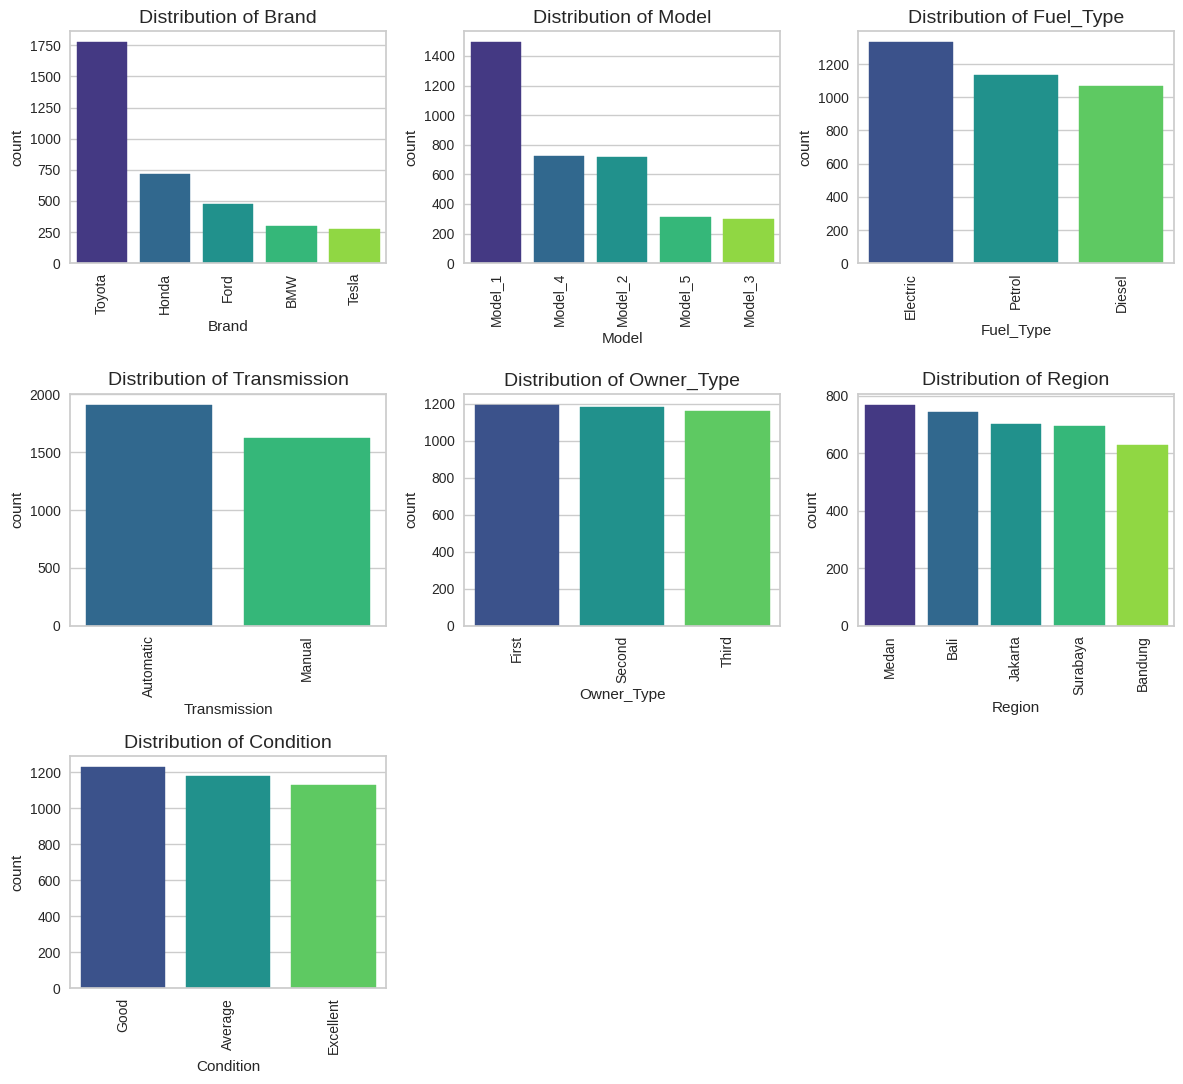

In [8]:
plt.figure(figsize=(12, 11))
for i in range(min(len(categories), 9)):
    plt.subplot(3, 3, i + 1)
    # Urutkan nilai dari tertinggi ke terendah
    sorted_values = df[categories[i]].value_counts().index # Select the i-th category
    # Buat palet warna
    palette = sns.color_palette("viridis", len(sorted_values))
    # Buat countplot tanpa menggunakan hue
    sns.countplot(data=df, x=categories[i], order=sorted_values) # Plot the i-th category
    # Tetapkan warna secara manual
    for bar, color in zip(plt.gca().patches, palette): # Get the current axes
        bar.set_color(color)
    plt.title(f'Distribution of {categories[i]}', fontsize=14) # Set title for the i-th category
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

dari distribusi data kategorik diatas dapat dilihat bahwa :
- kolom brand didominasi oleh Toyota dan honda
- kolom model didominasi oleh model 1,4 dan 2
- kolom fuel type distribusinya hampir saling mendominasi tapi yang paling tinggi tetap electric
- kolom tranmisi distribusinya hampir sama dan yang mendominasi tetap automatic
- kolom owner type distribusinya hampir saling mendominasi satu sama lain
- kolom region yang paling banyak membeli mobil adalah dari medan
- kolom condition didominasi oleh kondisi yang cukup baik  

In [9]:
numerics = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']

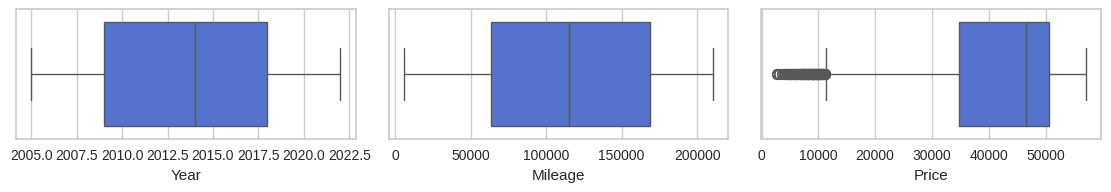

In [10]:
plt.figure(figsize=(15,15))
for i in range(0, len(numerics)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df[numerics[i]], color='royalblue')
    plt.xlabel(numerics[i])
    plt.tight_layout()

dari distribusi data numerik diatas dapat dilihat bahwa :
- pada tiap data terlihat simetris hanya 1 yang terlihat tidak simetris atau skewed
- pada distribusi data price terlihat skewed dan juga ada beberapa outlier yang dapat mempengaruhi model nantinya,karna itu perlu penanganan outlier berupa penghapusan outlier agar tidak mengganggu akurasi model dalam memproses data


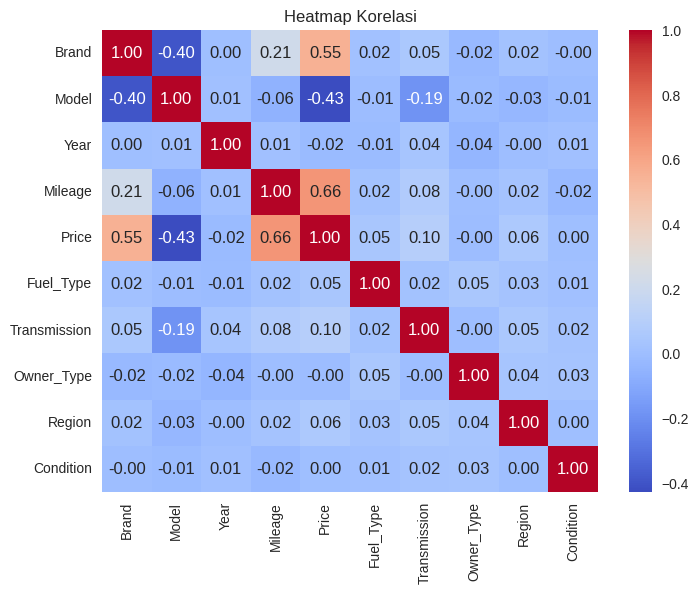

In [29]:
correlation_matrix = df.corr()

# Visualisasi Matriks Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

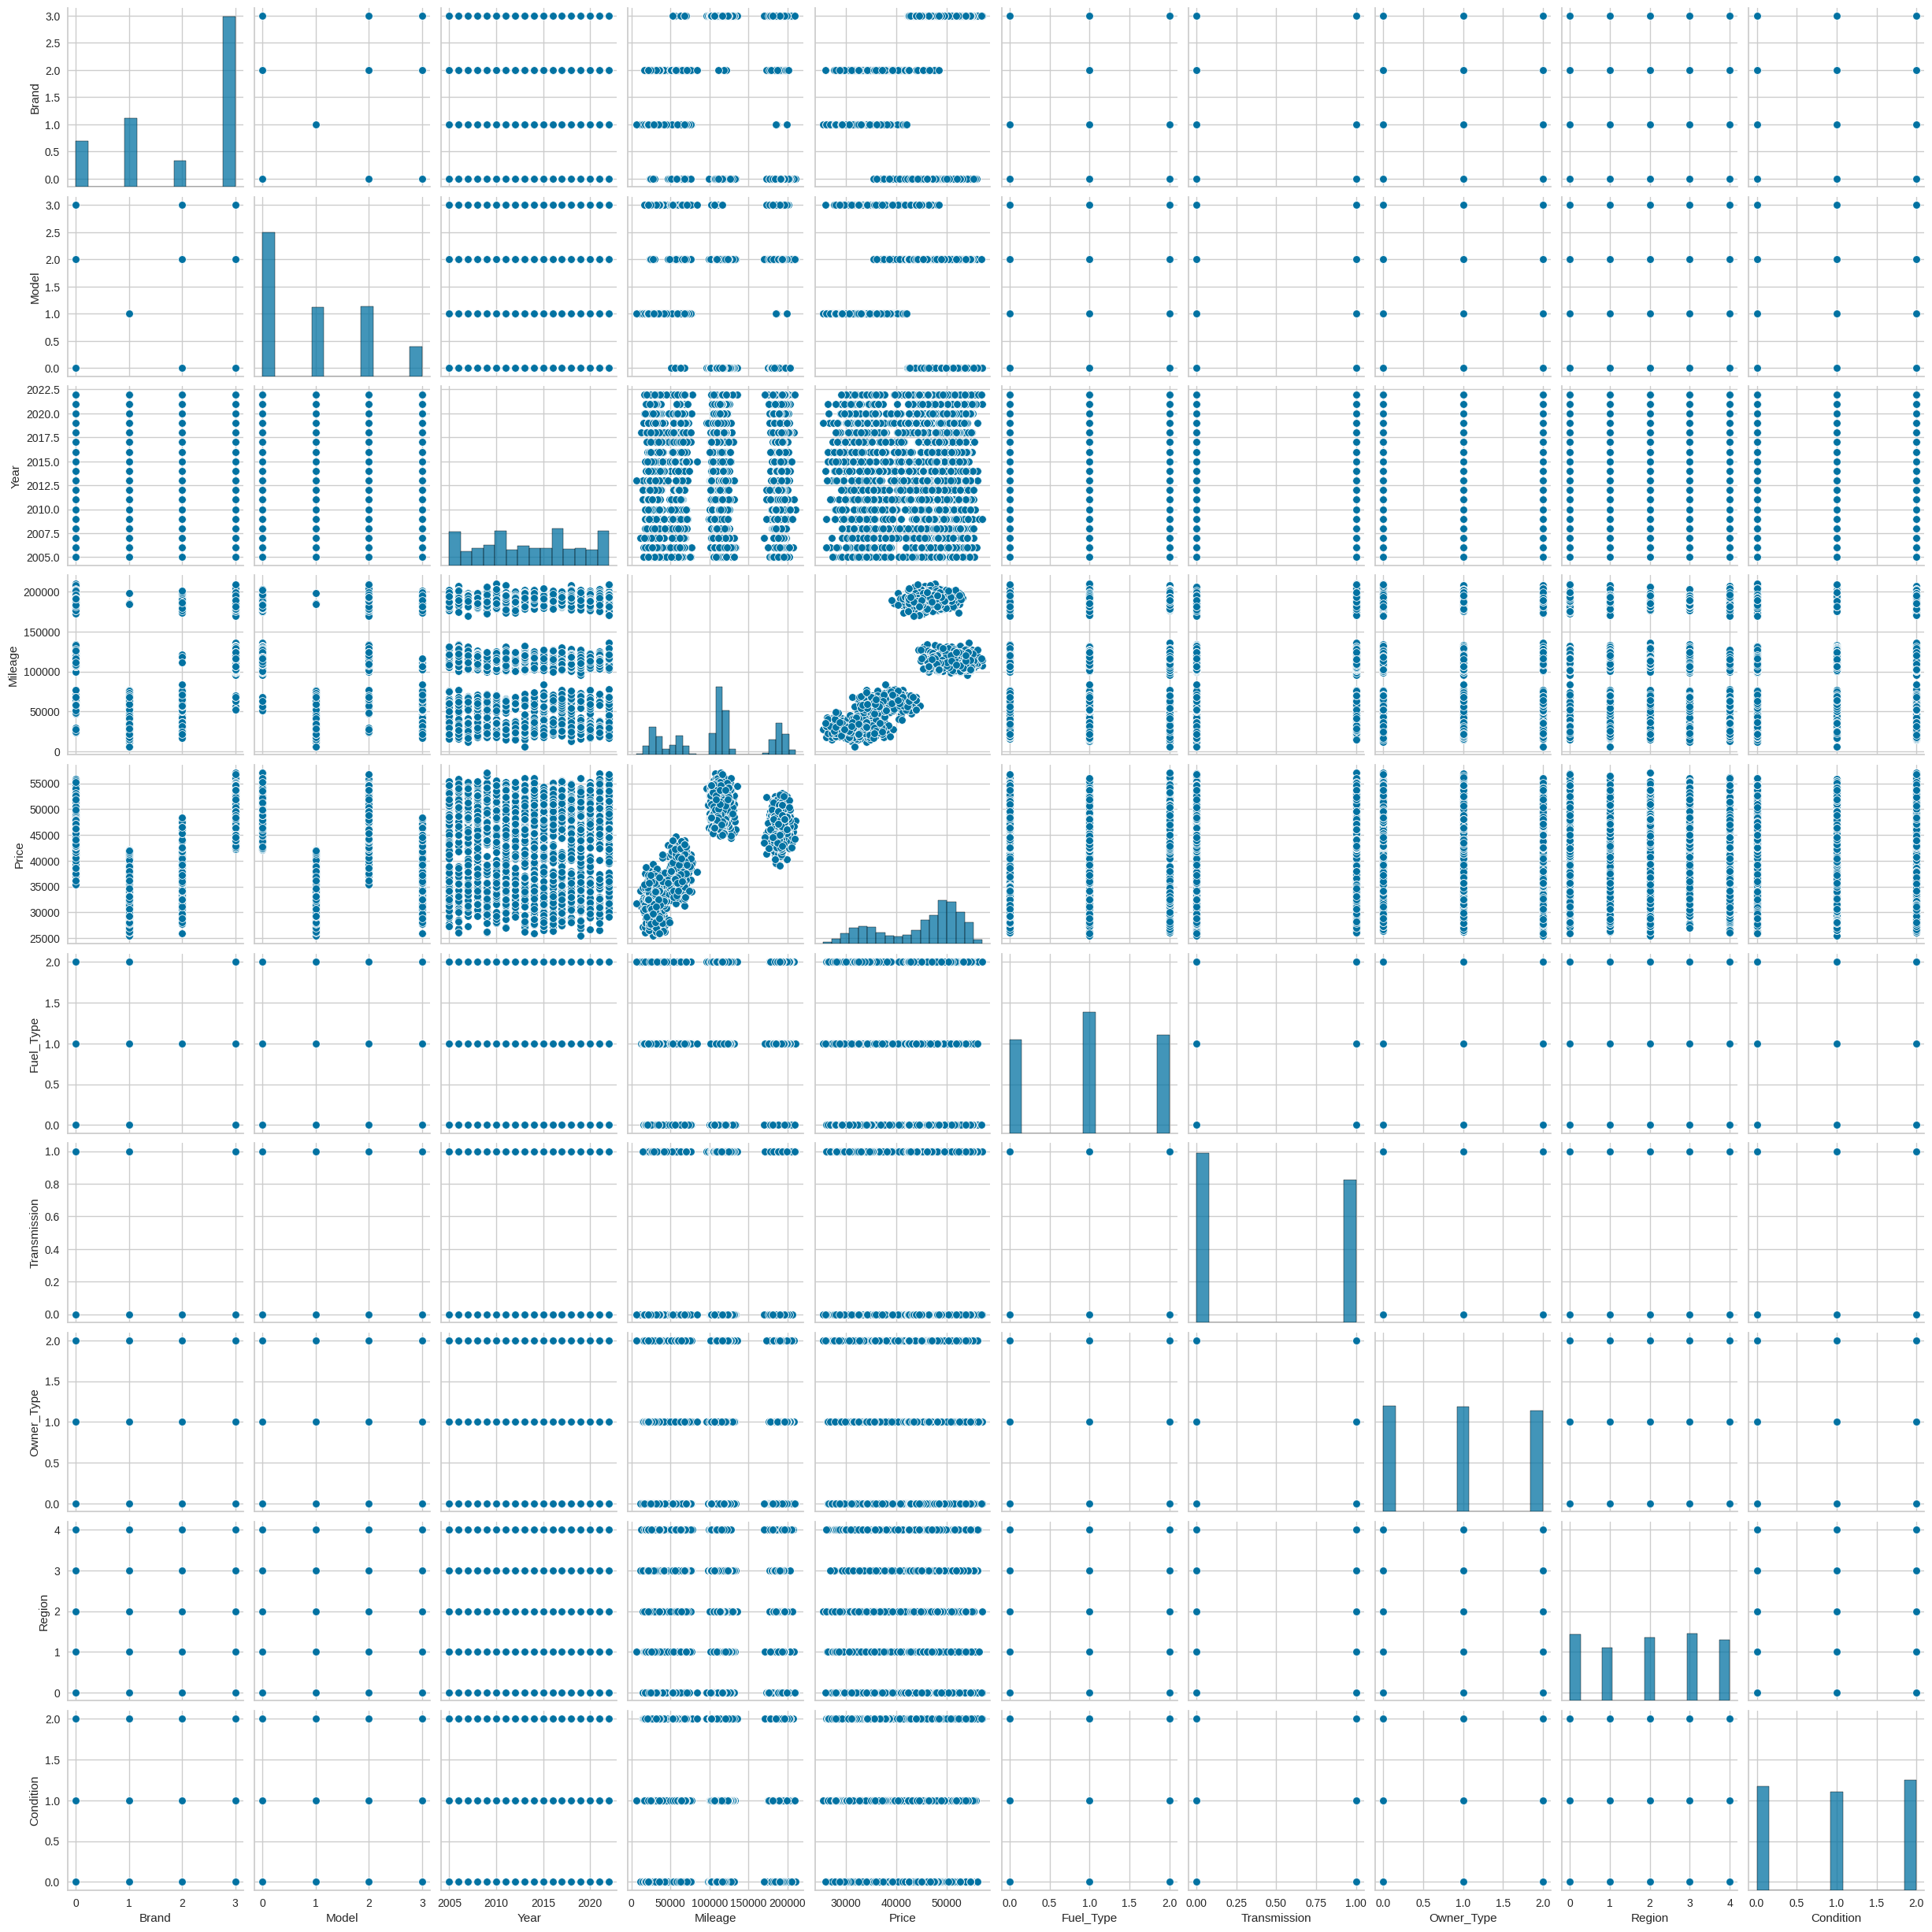

In [30]:
# Scatter Plot Matrix
sns.pairplot(df)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

## Penanganan outlier

In [11]:
for col in numerics:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)  # Access column from DataFrame 'df'
    Q3 = df[col].quantile(0.75)  # Access column from DataFrame 'df'
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.1 * IQR
    upper_bound = Q3 + 1.1 * IQR

    # Identifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Menghapus outlier dari DataFrame
    df = df.drop(outliers.index)

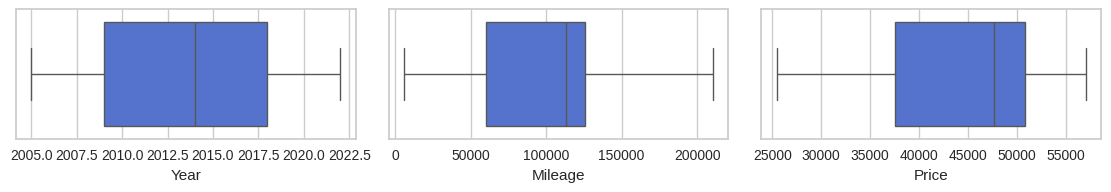

In [12]:
plt.figure(figsize=(15,15))
for i in range(0, len(numerics)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df[numerics[i]], color='royalblue')
    plt.xlabel(numerics[i])
    plt.tight_layout()

## encoding

In [13]:
# Copy the original data
data = df.copy()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object','category']).columns

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future use (e.g., decoding)

# Display the first few rows of the encoded df
df.head()


,Brand,Model,Year,Mileage,Price,Fuel_Type,Transmission,Owner_Type,Region,Condition
297,0,2,2016,198092.647132,44840.091521,1,0,0,3,1
298,0,2,2010,210530.000000,47695.432924,1,1,0,0,0
299,0,2,2014,186943.972162,42631.110451,2,1,2,1,0
300,0,2,2019,190463.786145,45812.616025,1,1,2,2,2
301,0,2,2012,187169.751650,50700.515207,2,1,2,3,2


## Normalisasi

In [14]:
data_clustering = df

In [15]:
numeric_features = [ 	 'Brand', 	'Model', 	'Year',	 'Mileage',	'Price','Fuel_Type', 	'Transmission' ,	'Owner_Type' ,	'Region', 	'Condition' ]

data_numeric = data_clustering[numeric_features]

# Normalize the numeric data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_numeric)

# Convert normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

# Display the normalized data
normalized_df.head()

,Brand,Model,Year,Mileage,Price,Fuel_Type,Transmission,Owner_Type,Region,Condition
0,-1.747757,1.014243,0.478092,1.588744,0.010356,-0.018938,-0.917272,-1.210627,0.696294,-0.023495
1,-1.747757,1.014243,-0.690177,1.811705,0.373303,-0.018938,1.090190,-1.210627,-1.410802,-1.231451
2,-1.747757,1.014243,0.088669,1.388884,-0.270432,1.259008,1.090190,1.246278,-0.708437,-1.231451
3,-1.747757,1.014243,1.062227,1.451983,0.133975,-0.018938,1.090190,1.246278,-0.006072,1.184460
4,-1.747757,1.014243,-0.300754,1.392932,0.755284,1.259008,1.090190,1.246278,0.696294,1.184460


## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

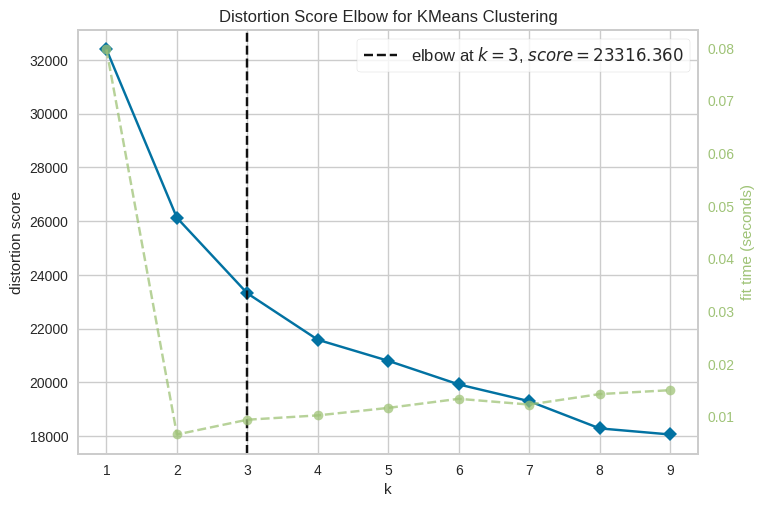

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(normalized_df)
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [18]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(normalized_df)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [19]:
selection = df.drop(columns=[ 'Fuel_Type','Transmission', 	'Owner_Type',  	'Condition'])

In [20]:
selection.head()

,Brand,Model,Year,Mileage,Price,Region
297,0,2,2016,198092.647132,44840.091521,3
298,0,2,2010,210530.000000,47695.432924,0
299,0,2,2014,186943.972162,42631.110451,1
300,0,2,2019,190463.786145,45812.616025,2
301,0,2,2012,187169.751650,50700.515207,3


In [21]:
selection['Brand'] = selection['Brand'].astype('object')
selection['Model'] = selection['Model'].astype('object')
selection['Region'] = selection['Region'].astype('object')

In [22]:
 selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 297 to 3535
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    3239 non-null   object 
 1   Model    3239 non-null   object 
 2   Year     3239 non-null   int64  
 3   Mileage  3239 non-null   float64
 4   Price    3239 non-null   float64
 5   Region   3239 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 152.0+ KB


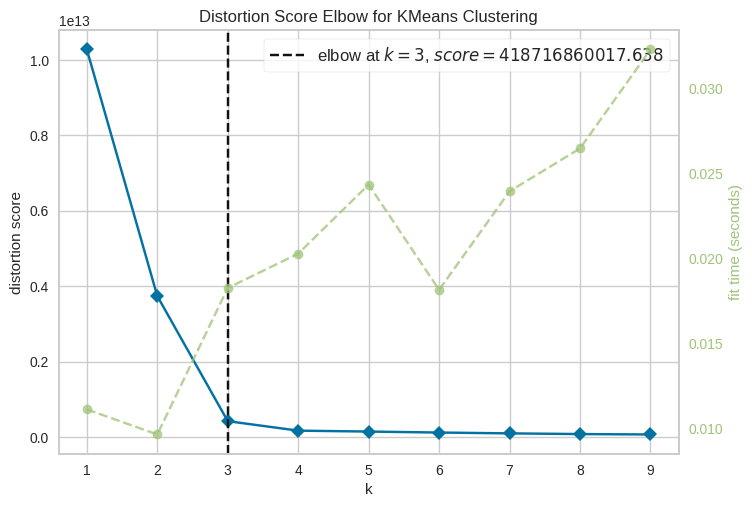

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer2 = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer2.fit(selection)

# Menampilkan grafik elbow untuk analisis
visualizer2.show()

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(selection)

# Mendapatkan label cluster
labels2 = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

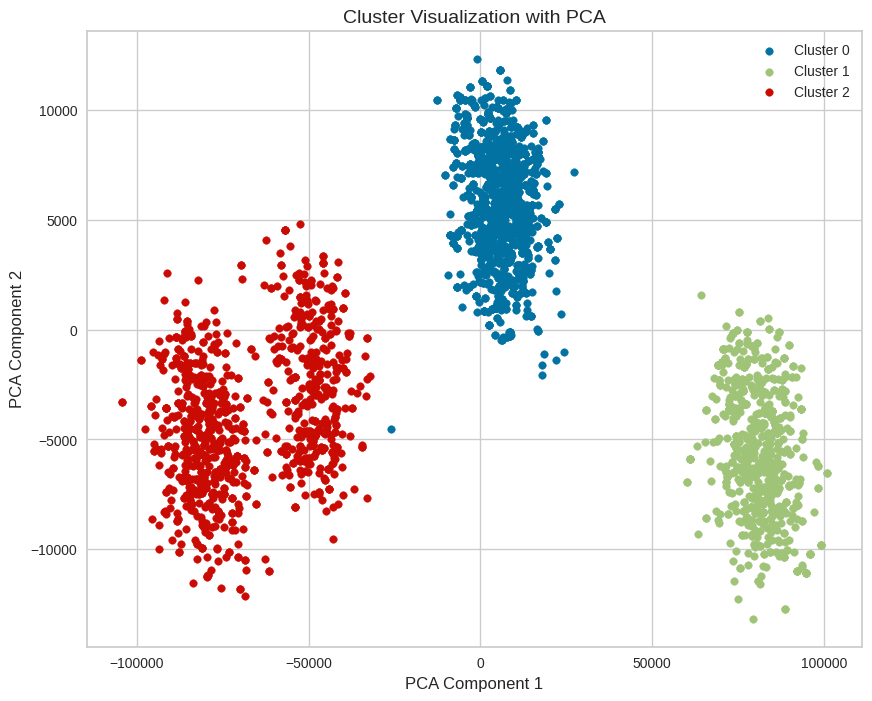

In [25]:
# Step 1: Reduce dimensions using PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(selection)

# Step 2: Plot the clusters
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(labels2):
    cluster_data = reduced_data[labels2 == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', s=30)

# Step 3: Customize plot
plt.title('Cluster Visualization with PCA', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [26]:
silhouette_avg = silhouette_score(df, labels)
print(f'Silhouette Score sebelum menerapkan feature selection: {silhouette_avg}')
silhouette_avg2 = silhouette_score(selection, labels2)
print(f'Silhouette Score setelah menerapkan feature selection: {silhouette_avg2}')


Silhouette Score sebelum menerapkan feature selection: 0.583866957787109
Silhouette Score setelah menerapkan feature selection: 0.8232954422860772


# **Evaluasi akhir pada clustering :**
### - Silhouette Score sebelum menerapkan feature selection: 0.583866957787109
### - Silhouette Score setelah menerapkan feature selection: 0.8232954422860772

### - Silhouette score mengalami kenaikan dari 0.583 menjadi  0.823

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [27]:
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(selection, labels2, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = selection[labels2 == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_brand = cluster_data.iloc[:, 0].mean()  # Rata-rata Brand
        mean_model = cluster_data.iloc[:, 1].mean()  # Rata-rata Model
        mean_year = cluster_data.iloc[:, 2].mean()  # Rata-rata Year
        mean_mileage = cluster_data.iloc[:, 3].mean()  # Rata-rata Mileage
        mean_price = cluster_data.iloc[:, 4].mean()  # Rata-rata Price
        mean_region = cluster_data.iloc[:, 5].mean()  # Rata-rata Region

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Brand: {mean_brand:.2f}")
        print(f"Rata-rata Model: {mean_model:.2f}")
        print(f"Rata-rata Year: {mean_year:.2f}")
        print(f"Rata-rata Mileage: {mean_mileage:.2f}")
        print(f"Rata-rata Price: {mean_price:.2f}")
        print(f"Rata-rata Region: {mean_region:.2f}")



# Analisis karakteristik setiap cluster
analyze_clusters(selection, labels2, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Brand: 2.77
Rata-rata Model: 0.29
Rata-rata Year: 2013.38
Rata-rata Mileage: 114545.41
Rata-rata Price: 50946.51
Rata-rata Region: 2.07

Cluster 2:
Rata-rata Brand: 1.73
Rata-rata Model: 1.43
Rata-rata Year: 2013.79
Rata-rata Mileage: 190603.63
Rata-rata Price: 46891.40
Rata-rata Region: 2.00

Cluster 3:
Rata-rata Brand: 1.21
Rata-rata Model: 1.54
Rata-rata Year: 2013.60
Rata-rata Mileage: 42107.56
Rata-rata Price: 34399.50
Rata-rata Region: 1.92


## Interpretasi Cluster


1. **Cluster 1:**

  *   **Rata-rata Brand**: 2.77
  *   **Rata-rata Model**: 0.29
  *   **Rata-rata Year:** 2013.38
  *   **Rata-rata Mileage:** 114545.41
  *   **Rata-rata Price:** 50946.51
  *   **Rata-rata Region:** 2.07
  *   **Analisis** : pada cluster ini didominasi oleh Tesla dan juga ada campuran  honda dengan model 1,tahunnya adalah 2013 dengan rata rata sedang daripada cluster lainnya dan untuk harga paling tinggi diantara cluster lainnya serta wilayah rata ratanya adalah jakarta, yang artinya pada cluster ini rata rata pelanggan lebih suka memilih brand premium dengan kilometer yang sedang dan berlokasi di jakarta


2. **Cluster 2:**

  *   **Rata-rata Brand**: 1.73
  *   **Rata-rata Model**: 1.43
  *   **Rata-rata Year:** 2013.79
  *   **Rata-rata Mileage:** 190603.63
  *   **Rata-rata Price:** 46891.40
  *   **Rata-rata Region:** 2.00
  *   **Analisis** : pada cluster ini brand didominasi oleh merek honda dengan model 2,tahunnya yaitu sekitar 2014 dengan rata rata kilometernya lebih tinggi dari cluster lainnya dan harganya sedang daripada cluster lainnya dengan lokasi rata rata dari jakarta, yang artinya pada cluster ini pelanggan lebih tertarik untuk membeli mobil dengan harga terjangkau karena sudah sering digunakan.

3. **Cluster 3:**

  *   **Rata-rata Brand**: 1.21
  *   **Rata-rata Model**: 1.54
  *   **Rata-rata Year:** 2013.60
  *   **Rata-rata Mileage:** 42107.56
  *   **Rata-rata Price:** 34399.50
  *   **Rata-rata Region:** 1.92
  *   **Analisis** : pada cluster ini brand didominasi oleh ford dengan model 3 yang memiliki tahun sekitar 2013 keatas dengan kilometer yang lebih rendah dari cluster lainnya dan harganya juga lebih murah dari cluster lainnya dengann wilayah sebagian besar di jakarta, pada cluster ini menunjukkan bahwa pelanggan lebih suka memilih mobil yang jarang digunakan dan harganya juga murah mungkin karena mereka ingin menghemat budget

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
# Tambahkan kolom cluster ke dataset asli
selection['Target'] = labels

# Tentukan nama file output
output_file = '/content/used_car_hasil_clustering.csv'  # Ganti dengan nama file yang diinginkan

# Simpan dataset ke file CSV
selection.to_csv(output_file, index=False)

print(f"Hasil cluster berhasil disimpan ke file: {output_file}")


Hasil cluster berhasil disimpan ke file: /content/used_car_hasil_clustering.csv
